<span style="font-family: 'Cascadia Mono'; font-size: 30px; color: Black; background-color:grey;">Probability & Statistics Semester Project</span>

### Group Members
1. `Hanana Asif`
2. `Muhammad Ahsan Ali`

<img src="PS/sleepsleep.png" alt="hel" width="105%" >

>
## Understanding `Sleep Habits` for better well-being
*You can visit this link to view the form used to collect the sample data*

https://docs.google.com/forms/d/e/1FAIpQLSdzRtPwCj3H5qCmPyi8bWz2cawhGt5OtGMt__0RGmDPfLG_4Q/viewform?usp=sf_link

## **`Survey Responses`**

<img src="PS/Q1.png" alt="hel" width="90%" >

<img src="PS/Q2.png" alt="hel" width="90%" >

<img src="PS/Q3.png" alt="hel" width="90%" >

<img src="PS/Q4.png" alt="hel" width="90%" >

<img src="PS/Q5.png" alt="hel" width="90%" >

<img src="PS/Q6.png" alt="hel" width="90%" >

## **`Survey Analysis`**

### `Task 1.` *Loading Data*

*Importing important libraries to be used for Analysis*

In [188]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as mplib
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import f_oneway

*Accessing the csv file containing the survey data*

In [189]:
file = 'H:\\P&SProject\\Sleep Habits.csv'


*Reading and storing the csv file as a DataFrame*

*Printing the DataFrame*

In [190]:
df=pd.read_csv(file,index_col=None)
df.head()


,Timestamp,How many hours of sleep do you get on a typical night?,Which of the following activities do you engage in during the hour before bedtime? (Check all that apply),Do you experience difficulty falling asleep?,"Do you consume caffeinated beverages (coffee, tea, energy drinks)?",Do you feel that the amount of sleep you get is sufficient for your needs?,"On a scale of 1 to 5, how much would you rate the overall quality of your sleep?"
0,12/24/2023 18:00:06,5,"Watching Reels, Using Electronic Devices",Yes,Ocassionally,It varies,3
1,12/24/2023 18:02:14,8,Engaging in Relaxing Activities,No,Regularly,"Yes, I feel well rested",3
2,12/24/2023 18:02:19,6,Watching Reels,Yes,Rarely,It varies,3
3,12/24/2023 18:00:01,7,Using Electronic Devices,Yes,Regularly,"No, I often feel tired",3
4,12/24/2023 18:04:34,3,Other,No,Rarely,"Yes, I feel well rested",2


### `Task 2.` *Data Cleaning*

*Dropping the Timestamps column as it is not required for analysis*

In [191]:
df=df.drop('Timestamp',axis=1)

In [192]:
df.head()

,How many hours of sleep do you get on a typical night?,Which of the following activities do you engage in during the hour before bedtime? (Check all that apply),Do you experience difficulty falling asleep?,"Do you consume caffeinated beverages (coffee, tea, energy drinks)?",Do you feel that the amount of sleep you get is sufficient for your needs?,"On a scale of 1 to 5, how much would you rate the overall quality of your sleep?"
0,5,"Watching Reels, Using Electronic Devices",Yes,Ocassionally,It varies,3
1,8,Engaging in Relaxing Activities,No,Regularly,"Yes, I feel well rested",3
2,6,Watching Reels,Yes,Rarely,It varies,3
3,7,Using Electronic Devices,Yes,Regularly,"No, I often feel tired",3
4,3,Other,No,Rarely,"Yes, I feel well rested",2


*Changing the column names to brief names*

In [193]:
df.columns = ['Hours', 'Activities', 'Sleeplessness', 'CaffeineConsumption', 'Sleepsatisfaction', 'SleepQuality']
df.head()

,Hours,Activities,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
0,5,"Watching Reels, Using Electronic Devices",Yes,Ocassionally,It varies,3
1,8,Engaging in Relaxing Activities,No,Regularly,"Yes, I feel well rested",3
2,6,Watching Reels,Yes,Rarely,It varies,3
3,7,Using Electronic Devices,Yes,Regularly,"No, I often feel tired",3
4,3,Other,No,Rarely,"Yes, I feel well rested",2


*As the activities column contained options of a checkbox, splitting the options and storing as an array*

### `Task 3.` *Data Exploration*

*As the activities column contained options of a checkbox, splitting the options and storing as an array*

In [194]:
df['Activities'] = df['Activities'].str.split(', ')
df.head()

,Hours,Activities,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
0,5,"[Watching Reels, Using Electronic Devices]",Yes,Ocassionally,It varies,3
1,8,[Engaging in Relaxing Activities],No,Regularly,"Yes, I feel well rested",3
2,6,[Watching Reels],Yes,Rarely,It varies,3
3,7,[Using Electronic Devices],Yes,Regularly,"No, I often feel tired",3
4,3,[Other],No,Rarely,"Yes, I feel well rested",2


### `Task 4.` *Frequency Distributions*

*Printing Frequency Distribution Tables for each column*

""
Hours
10 - 11
3 - 10
4 - 11
5 - 20
6 - 41
7 - 32
8 - 18
9 - 15


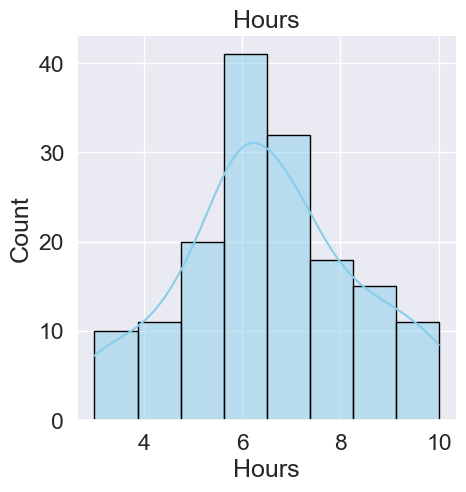

----------------------------------------------------------------


""
SleepQuality
1 - 27
2 - 36
3 - 56
4 - 29
5 - 10


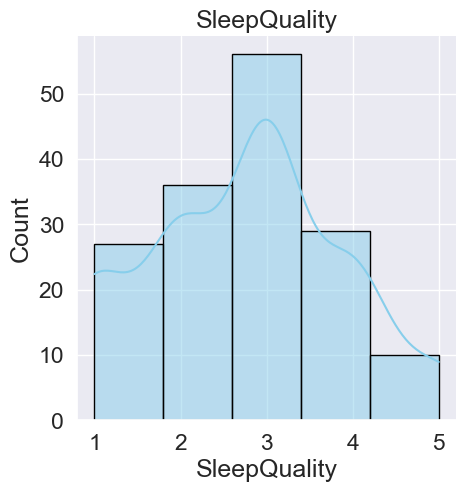

----------------------------------------------------------------


In [195]:
sea.set(font_scale=1.5)
def freq_dist(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_values = df[col].nunique()
            col1 = []
            col2 = []

            for value in sorted(df[col].unique()):
                count = (df[col] == value).sum()
                col1.append(f'{value} - {count}')
                col2.append(value)

            freq_distribution_df = pd.DataFrame({f'{col}': col1})
            freq_distribution_df.set_index(f'{col}', inplace=True)
            freq_distribution_df.sort_index(inplace=True)  # Sort by response values
            display(freq_distribution_df)

            sea.displot(df[col], kde=True, bins=unique_values,edgecolor='black',color='skyblue').set(title=col)
            mplib.show()

            print("----------------------------------------------------------------")

freq_dist(df)

*The Hours and SleepQuality columns show bell shaped graph which represent normal distribution*

In [196]:

        frequency = df.explode('Activities')['Activities'].value_counts()
        print(f"=========FREQUENCY FOR {'Activities'.upper()}=========\n{frequency}\n")


=========FREQUENCY FOR ACTIVITIES=========
Activities
Watching Reels                     50
Using Electronic Devices           49
Other                              43
Reading                            34
Engaging in Relaxing Activities    31
Name: count, dtype: int64



### `Task 5.` *Data Reprocessing*

*Preparing Data for Analysis by standardizing as integer values*

#### 1. `CaffeineConsumption`

In [197]:
category_mapping = {'Rarely': 0, 'Ocassionally': 1, 'Regularly': 2}
df['CaffeineConsumption'] = df['CaffeineConsumption'].replace(category_mapping)
df.head()

,Hours,Activities,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
0,5,"[Watching Reels, Using Electronic Devices]",Yes,1,It varies,3
1,8,[Engaging in Relaxing Activities],No,2,"Yes, I feel well rested",3
2,6,[Watching Reels],Yes,0,It varies,3
3,7,[Using Electronic Devices],Yes,2,"No, I often feel tired",3
4,3,[Other],No,0,"Yes, I feel well rested",2


#### 2. `Sleeplessness`

In [198]:
category_mapping = {'Yes': 0, 'No': 1}
df['Sleeplessness'] = pd.factorize(df['Sleeplessness'].map(category_mapping))[0]
df.head()

,Hours,Activities,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
0,5,"[Watching Reels, Using Electronic Devices]",0,1,It varies,3
1,8,[Engaging in Relaxing Activities],1,2,"Yes, I feel well rested",3
2,6,[Watching Reels],0,0,It varies,3
3,7,[Using Electronic Devices],0,2,"No, I often feel tired",3
4,3,[Other],1,0,"Yes, I feel well rested",2


#### 3. `Sleepsatisfaction`

In [199]:
category_mapping = {'No, I often feel tired': 0, 'It varies': 1, 'Yes, I feel well rested': 2}
df['Sleepsatisfaction'] = df['Sleepsatisfaction'].replace(category_mapping)
df.head()

,Hours,Activities,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
0,5,"[Watching Reels, Using Electronic Devices]",0,1,1,3
1,8,[Engaging in Relaxing Activities],1,2,2,3
2,6,[Watching Reels],0,0,1,3
3,7,[Using Electronic Devices],0,2,0,3
4,3,[Other],1,0,2,2


### `Task 6.` *Exploratory Data Analysis*

#### 1. `Histograms`

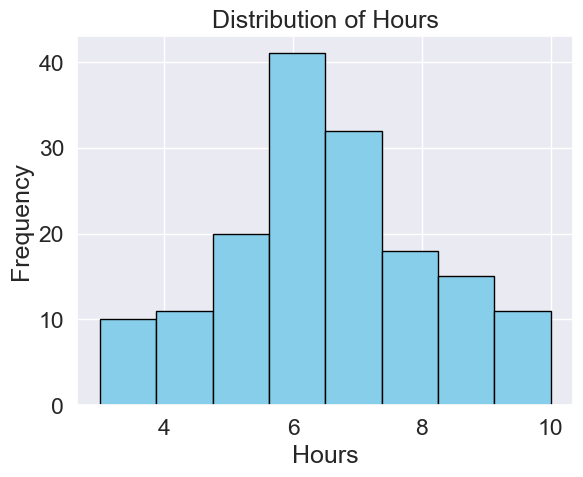

In [200]:
mplib.hist(df['Hours'], bins=8, color='skyblue', edgecolor='black')
mplib.title('Distribution of Hours')
mplib.xlabel('Hours')
mplib.ylabel('Frequency')
mplib.show()

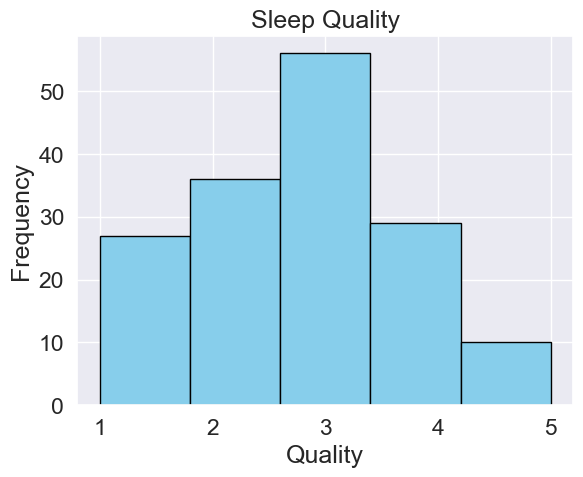

In [201]:
mplib.hist(df['SleepQuality'], bins=5, color='skyblue', edgecolor='black')
mplib.title('Sleep Quality')
mplib.xlabel('Quality')
mplib.ylabel('Frequency')
mplib.show()

#### 2. `Descriptive Statistics`

In [202]:
df.describe()


,Hours,Sleeplessness,CaffeineConsumption,Sleepsatisfaction,SleepQuality
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,6.537975,0.531646,1.120253,0.892405,2.740506
std,1.825635,0.500584,0.760134,0.802746,1.135307
min,3.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,0.000000,1.000000,0.000000,2.000000
50%,6.000000,1.000000,1.000000,1.000000,3.000000
75%,8.000000,1.000000,2.000000,2.000000,3.000000
max,10.000000,1.000000,2.000000,2.000000,5.000000


#### 3. `Probabilty Distribution`

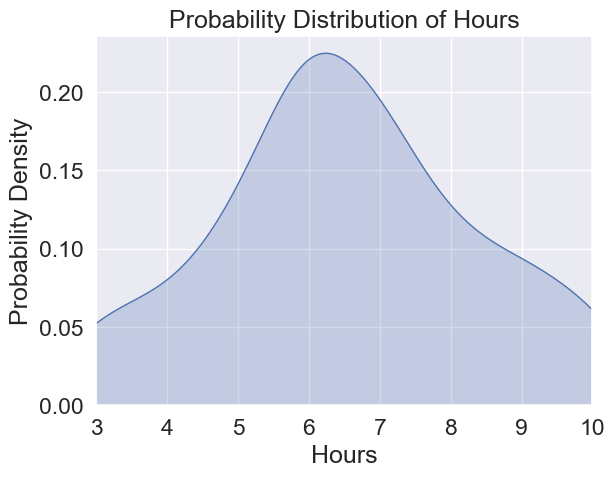

In [203]:
sea.kdeplot(df['Hours'],fill=True)
mplib.xlim(3, 10)
mplib.title(f'Probability Distribution of {'Hours'}')
mplib.xlabel('Hours')
mplib.ylabel('Probability Density')
mplib.show()

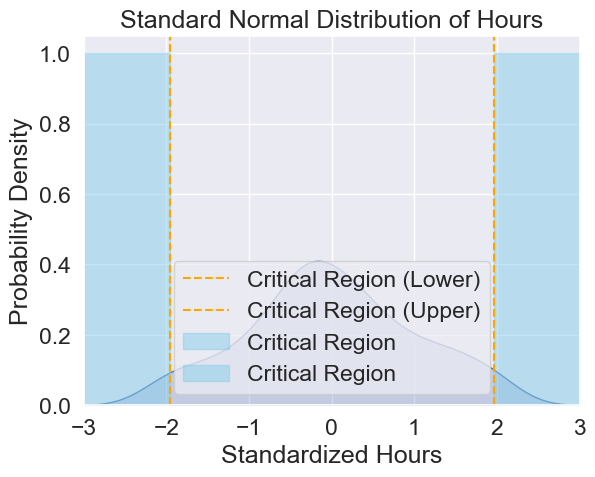

Critical Values for a Two-Tailed Test: [4.5780107  8.49793867]


In [204]:
# Standardize the 'Hours' column
standardized_data = (df['Hours'] - df['Hours'].mean()) / df['Hours'].std()

# Create the Seaborn KDE plot for the standardized data
sea.kdeplot(standardized_data, fill=True)

# Set the x-axis limits for the standardized data
mplib.xlim(-3, 3)  # Standard normal distribution typically ranges from -3 to 3

# Add labels and title
mplib.title(f'Standard Normal Distribution of Hours')
mplib.xlabel('Standardized Hours')
mplib.ylabel('Probability Density')

# Calculate critical values for a two-tailed test
alpha = 0.05  # significance level
critical_values = stats.norm.ppf([alpha/2, 1-alpha/2])

# Plot critical region
mplib.axvline(critical_values[0], color='orange', linestyle='--', label='Critical Region (Lower)')
mplib.axvline(critical_values[1], color='orange', linestyle='--', label='Critical Region (Upper)')

# Highlight the critical region
mplib.fill_betweenx(y=np.linspace(0, 1, 100), x1=-3, x2=critical_values[0], color='skyblue', alpha=0.5, label='Critical Region')
mplib.fill_betweenx(y=np.linspace(0, 1, 100), x1=critical_values[1], x2=3, color='skyblue', alpha=0.5, label='Critical Region')

# Show the plot
mplib.legend()
mplib.show()

# Calculate critical values for the original 'Hours' data
x_critical = critical_values  + df['Hours'].mean()
print(f'Critical Values for a Two-Tailed Test: {x_critical}')


*As the `Hours` column was showed a Normal Distribution, we converted it into Standard Normal Distribution to find critical values for 95% Confidence Level*

### `Task 6.` *Hypothesis Testing*

### `Hypothesis 1`

**Null Hypothesis:* Those The mean sleep quality is the same for people who sleep between 5 to 7 hours and those who dont*

**Alternate Hypothesis:* The mean sleep quality is significantly different for people who sleep between 5 to 7 hours compared to those who dont*

In [205]:
column_hours = 'Hours'
column_sleep_quality = 'SleepQuality'

# Define the groups for the hypothesis test
group_5_to_7_hours = df[(df[column_hours] >= 5) & (df[column_hours] <= 7)][column_sleep_quality]
group_other_hours = df[(df[column_hours] < 5) | (df[column_hours] > 7)][column_sleep_quality]

# Perform a t-test for independent samples
t_statistic, p_value = ttest_ind(group_5_to_7_hours, group_other_hours, equal_var=False)
print("P-Value=",p_value)
# Define the significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    
    print(f'Reject the null hypothesis. There is a significant difference in sleep quality.')
else:
    print("P-value>0.05")
    print('Fail to reject the null hypothesis. There is no significant difference in sleep quality.')

P-Value= 0.31562564286278544
P-value>0.05
Fail to reject the null hypothesis. There is no significant difference in sleep quality.


### `Hypothesis 2`

**Null Hypothesis:* The mean level of sleeplessness is the same for individuals with high caffeine consumption (caffeine consumption greater than or equal to 1) and those with low caffeine consumption (caffeine consumption equal to 0)*

**Alternate Hypothesis:* There is a significant difference in the mean level of sleeplessness between individuals with high caffeine consumption and those with low caffeine consumption*

In [206]:
column_caffeine = 'CaffeineConsumption'
column_sleeplessness = 'Sleeplessness'

# Define the groups for the hypothesis test
group_high_caffeine = df[df[column_caffeine] >= 1][column_sleeplessness]
group_low_caffeine = df[df[column_caffeine] == 0][column_sleeplessness]

# Perform a t-test for independent samples
t_statistic, p_value = ttest_ind(group_high_caffeine, group_low_caffeine, equal_var=False)

# Define the significance level
alpha = 0.05

# Check the p-value against the significance level
print("P-Value: ",p_value)
if p_value < alpha:
    print(f'Reject the null hypothesis. There is a significant difference in sleeplessness.')
else:
    print("P-value>0.05")
    print('Fail to reject the null hypothesis. There is no significant difference in sleeplessness.')

P-Value:  0.38379802550661046
P-value>0.05
Fail to reject the null hypothesis. There is no significant difference in sleeplessness.


### `Task 7.` *Additional Analysis*

### `Correlation Analysis` 

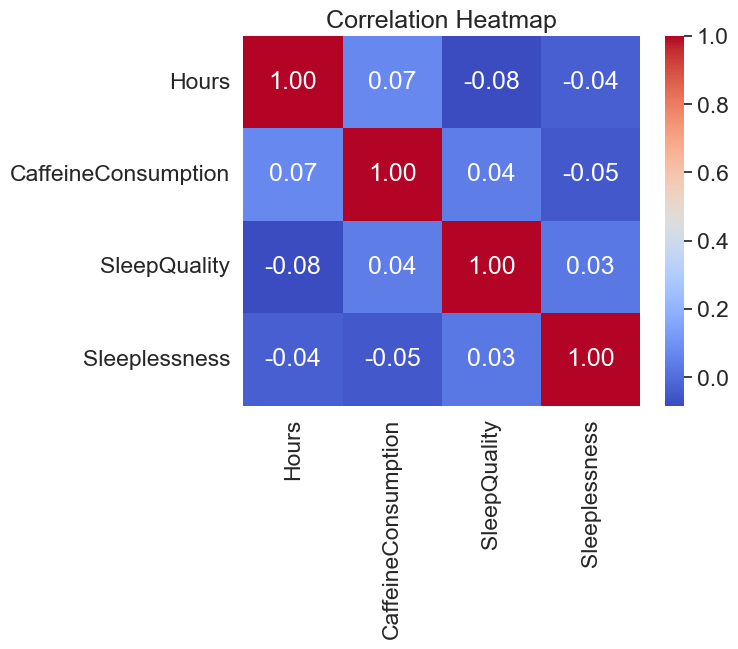

In [207]:
columns_of_interest = ['Hours', 'CaffeineConsumption', 'SleepQuality','Sleeplessness']

# Extract the relevant columns
df_subset = df[columns_of_interest]

# Display the correlation matrix
correlation_matrix = df_subset.corr()

# Visualize the correlation matrix as a heatmap
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
mplib.title('Correlation Heatmap')
mplib.show()

### `Pair Plot` 

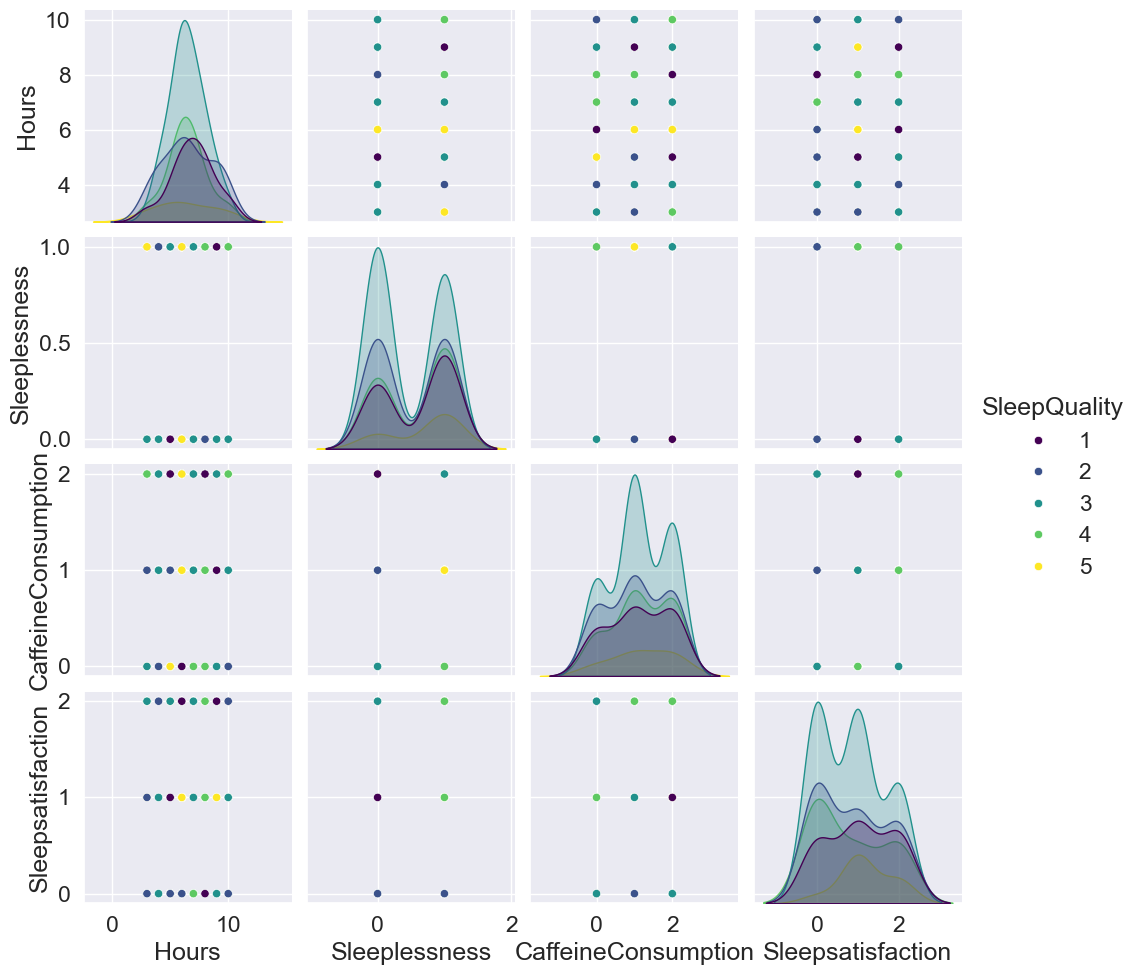

In [208]:
sea.pairplot(df, hue='SleepQuality', palette='viridis')
mplib.show()

### `Contigency Matrix`

In [209]:
from scipy.stats import chi2_contingency

# Explode the 'Activities' column to create one row for each activity
df_exploded = df.explode('Activities')

# Create a contingency table
contingency_table = pd.crosstab(df_exploded['Activities'], df_exploded['Sleeplessness'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
contingency_table.columns = ['1', '0']
# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi-square value: 28.634876654139028
P-value: 9.272603294532932e-06
Degrees of freedom: 4
Contingency Table:
                                  1   0
Activities                             
Engaging in Relaxing Activities  12  19
Other                            10  33
Reading                          10  24
Using Electronic Devices         27  22
Watching Reels                   36  14


*It shows that those who use electronic devices in a 1 hour span before sleeping are often sleepless as compared to those who engage in activities like reading etc*

### `Thanks for Visiting`